
# TASK 4
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


Data set: Twitter <br>
Data source:kaggle


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#importing data set
df=pd.read_csv("twitter_training.csv")
df
df.head(10)

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   
5  2402  Borderlands  Positive   
6  2402  Borderlands  Positive   
7  2402  Borderlands  Positive   
8  2402  Borderlands  Positive   
9  2402  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
5  So I spent a few hours making something for fu...     
6  So I spent a couple of hours doing something f...     
7  So I spent a few hours doing something for fun...     
8  So I spent a few hours making something for fu...     
9  2010 So I spent a few hours making something f...

In [19]:
# Display the original column names
print("Original Column Names:")
print(df.columns)

# Rename the columns
new_column_names = {'2401': 'Twitter_id', 'Borderlands': 'Entities', 'Positive':'Sentiments','im getting on borderlands and i will murder you all ,':'Tweetcontents'}
df = df.rename(columns=new_column_names)

# Display the new column names
print("\nNew Column Names:")
print(df.columns)


Original Column Names:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

New Column Names:
Index(['Twitter_id', 'Entities', 'Sentiments', 'Tweetcontents'], dtype='object')


In [20]:
df.head(10)

Twitter_id     Entities Sentiments  \
0        2401  Borderlands   Positive   
1        2401  Borderlands   Positive   
2        2401  Borderlands   Positive   
3        2401  Borderlands   Positive   
4        2401  Borderlands   Positive   
5        2402  Borderlands   Positive   
6        2402  Borderlands   Positive   
7        2402  Borderlands   Positive   
8        2402  Borderlands   Positive   
9        2402  Borderlands   Positive   

                                       Tweetcontents  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
5  So I spent a few hours making something for fu...  
6  So I spent a couple of hours doing something f...  
7  So I spent a few hours doing something for fun...  
8  So I spent a few hours making something for fu...  
9  2010 So I spent a few hours making something f...

In [21]:
df.info()
#dropping null values
df.dropna(inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Twitter_id     74681 non-null  int64 
 1   Entities       74681 non-null  object
 2   Sentiments     74681 non-null  object
 3   Tweetcontents  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Twitter_id     Entities Sentiments  \
0            2401  Borderlands   Positive   
1            2401  Borderlands   Positive   
2            2401  Borderlands   Positive   
3            2401  Borderlands   Positive   
4            2401  Borderlands   Positive   
...           ...          ...        ...   
74676        9200       Nvidia   Positive   
74677        9200       Nvidia   Positive   
74678        9200       Nvidia   Positive   
74679        9200       Nvidia   Positive   
74680        9200       Nvidia   Positive   

                                           Tweetcontents  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[73995 rows x 4 columns]

In [22]:
print(df.head())
#sentiment distribution
sentiment_counts=df['Sentiments'].value_counts()

   Twitter_id     Entities Sentiments  \
0        2401  Borderlands   Positive   
1        2401  Borderlands   Positive   
2        2401  Borderlands   Positive   
3        2401  Borderlands   Positive   
4        2401  Borderlands   Positive   

                                       Tweetcontents  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


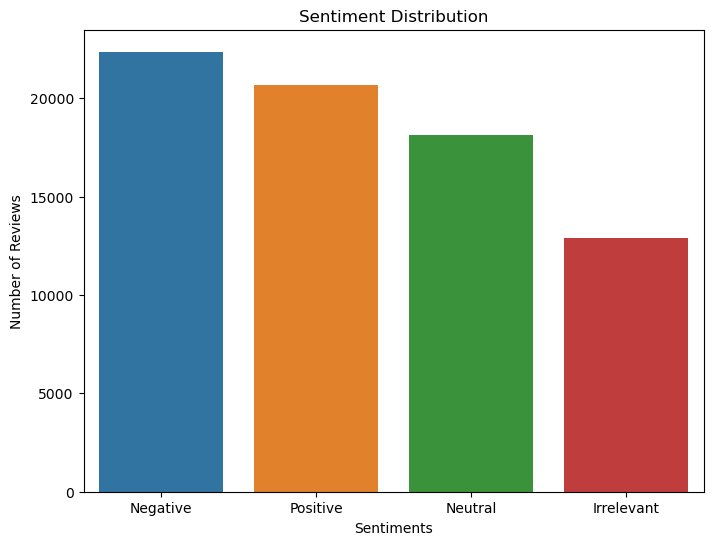

In [23]:
#Sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(x="Sentiments",data=df,order=df["Sentiments"].value_counts().index)
plt.title("Sentiment Distribution")
plt.xlabel('Sentiments')
plt.ylabel("Number of Reviews")
plt.show()

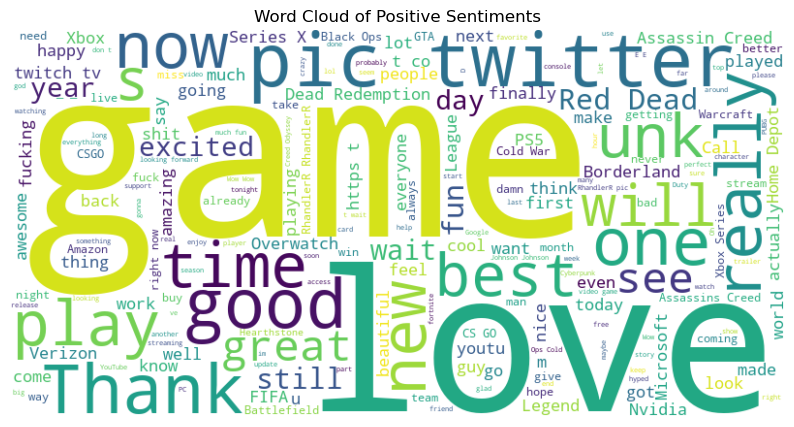

In [25]:
#Word cloud for positive sentiments

from wordcloud import WordCloud
# Filter the dataset to include only tweets with positive sentiment
positive_tweets = df[df['Sentiments'] == 'Positive']

# Concatenate all positive tweets into a single string
positive_text = ' '.join(positive_tweets['Tweetcontents'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments')
plt.axis('off')
plt.show()


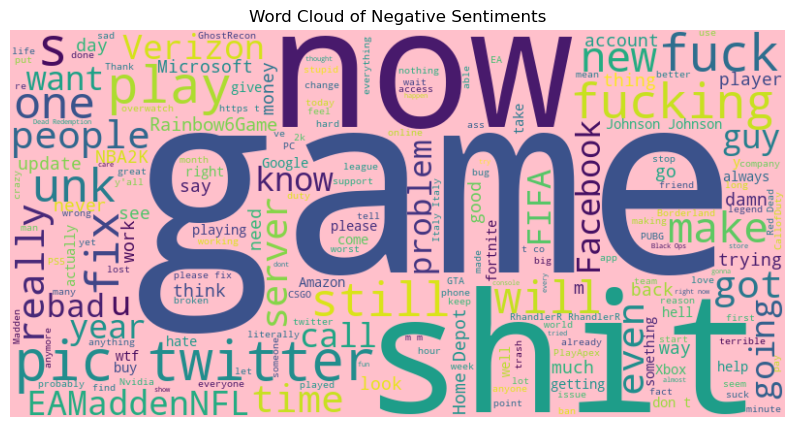

In [26]:
#Word cloud for negative sentiments

from wordcloud import WordCloud
# Filter the dataset to include only tweets with positive sentiment
positive_tweets = df[df['Sentiments'] == 'Negative']

# Concatenate all positive tweets into a single string
positive_text = ' '.join(positive_tweets['Tweetcontents'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(positive_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments')
plt.axis('off')
plt.show()


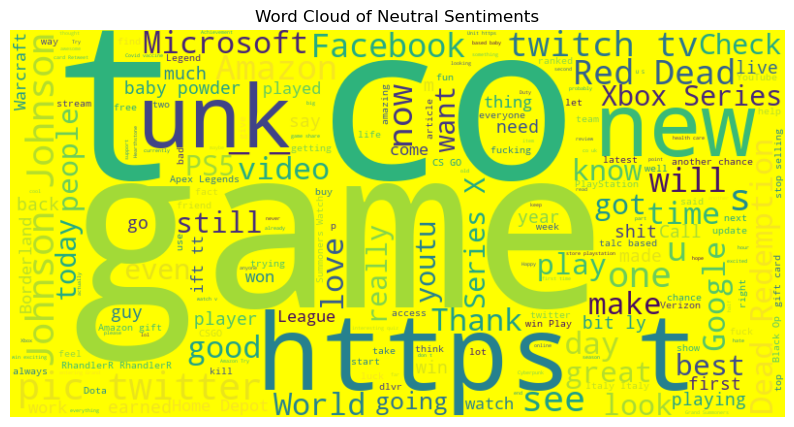

In [27]:
#Word cloud for neutral sentiments

from wordcloud import WordCloud
# Filter the dataset to include only tweets with positive sentiment
positive_tweets = df[df['Sentiments'] == 'Neutral']

# Concatenate all positive tweets into a single string
positive_text = ' '.join(positive_tweets['Tweetcontents'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='yellow').generate(positive_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Neutral Sentiments')
plt.axis('off')
plt.show()


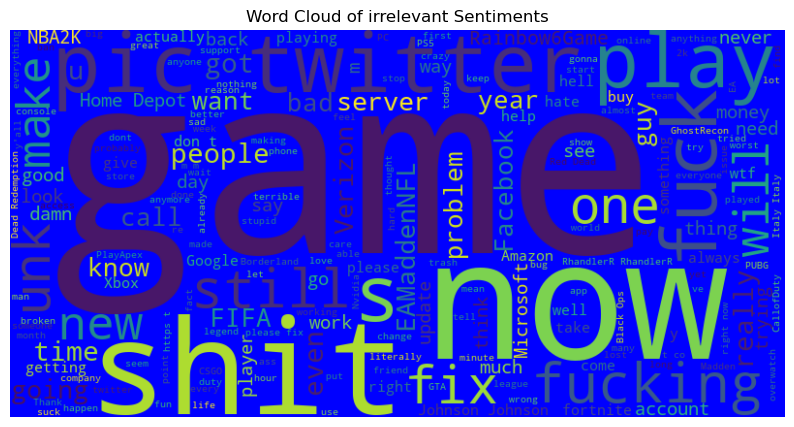

In [28]:
#Word cloud for irrelevant sentiments

from wordcloud import WordCloud
# Filter the dataset to include only tweets with positive sentiment
positive_tweets = df[df['Sentiments'] == 'Negative']

# Concatenate all positive tweets into a single string
positive_text = ' '.join(positive_tweets['Tweetcontents'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='blue').generate(positive_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of irrelevant Sentiments')
plt.axis('off')
plt.show()


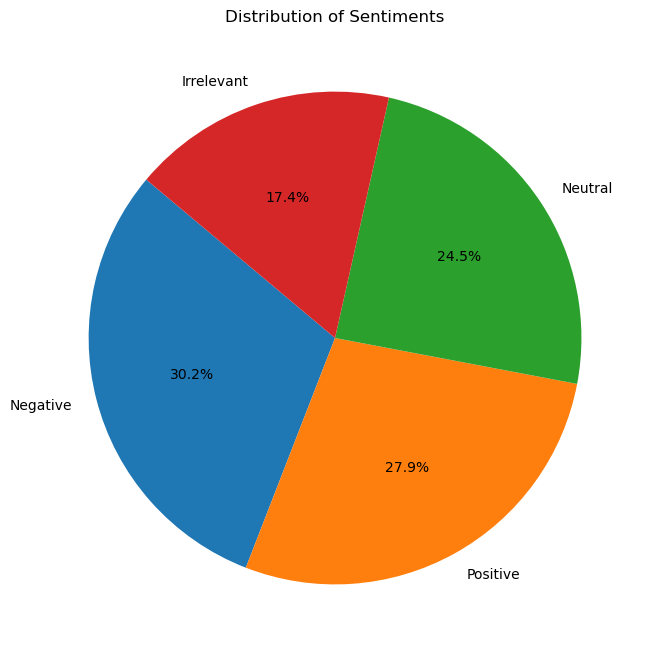

In [29]:
Sentiment_counts=df['Sentiments'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(Sentiment_counts,labels=Sentiment_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Sentiments')
plt.show()

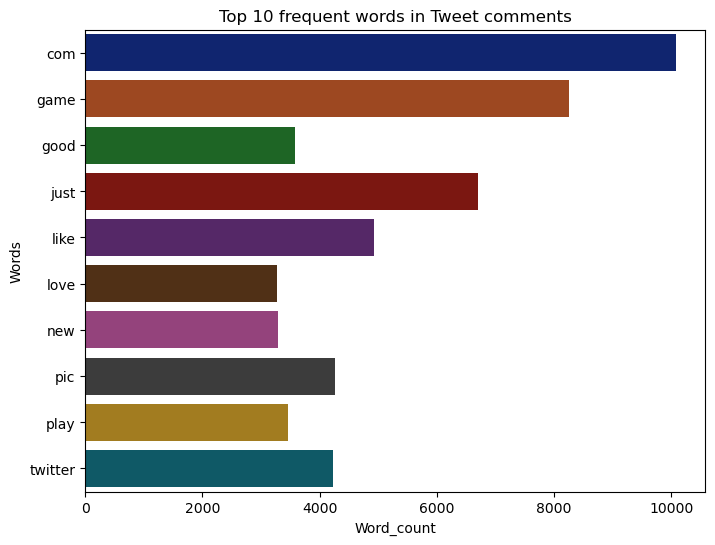

In [32]:
#bar plot of top 10 frequent words in tweet comments
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(stop_words='english',max_features=10)
word_frequency=vectorizer.fit_transform(df['Tweetcontents'])
words=vectorizer.get_feature_names_out()
word_counts=word_frequency.sum(axis=0).A1


plt.figure(figsize=(8,6))
sns.barplot(x=word_counts, y=words,palette='dark')
plt.title('Top 10 frequent words in Tweet comments')
plt.xlabel("Word_count")
plt.ylabel("Words")
plt.show()

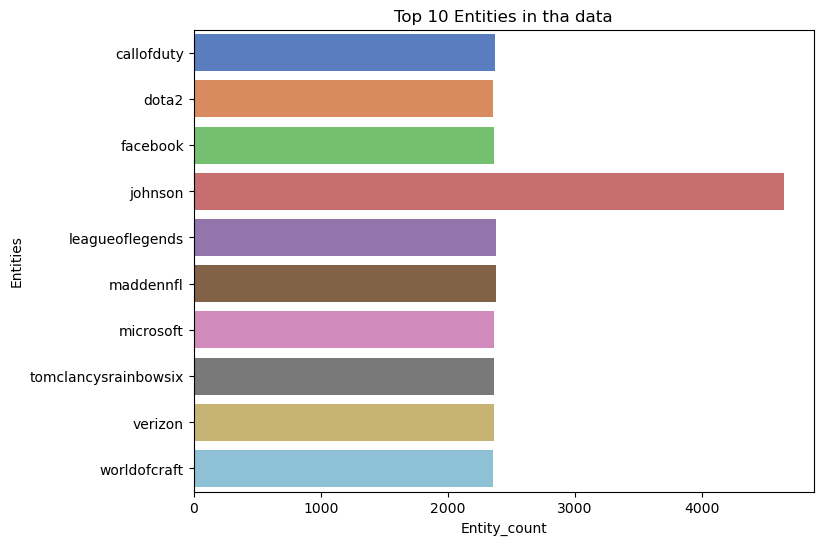

In [14]:
#bar plot of top 10 Entities in tha data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(stop_words='english',max_features=10)
word_frequency=vectorizer.fit_transform(df['Entities'])
words=vectorizer.get_feature_names_out()
word_counts=word_frequency.sum(axis=0).A1


plt.figure(figsize=(8,6))
sns.barplot(x=word_counts, y=words,palette='muted')
plt.title('Top 10 Entities in tha data')
plt.xlabel("Entity_count")
plt.ylabel("Entities")
plt.show()

In [15]:
import plotly.express as px
fig=px.treemap(df,path=['Sentiments'], title="Tree map for Sentiments")
fig.show()

In [16]:
fig=px.pie(df,names='Entities',hole=0.4,title="Doughnut for Entities")
fig.show()

<b>INFERENCE</b>:<br>
It is seen that the sentiment distribution in the dataset shows more negative reviews(30.2%) than the positive reviews(27.9%) but with 24.5% neutral reviews.
And from the top 10 frequent words in twwet comments,"com" comes first.And "Johnson" seem to be the top Entity with more than 4000 entity count.

The visual impact of larger, bold words in each sentiment word cloud indicate that, that words can quickly convey the overall sentiment tone, like they are more frequently mentioned in the text.
Larger, darker words serve as keywords, providing a quick overview of the primary focus or content of the text.